<a href="https://colab.research.google.com/github/GodJiLee/Tensorflow-Study/blob/main/7/11_%EB%94%A5%EB%9F%AC%EB%8B%9D%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EA%B5%90%EA%B3%BC%EC%84%9C_ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **텐서플로우 개요**

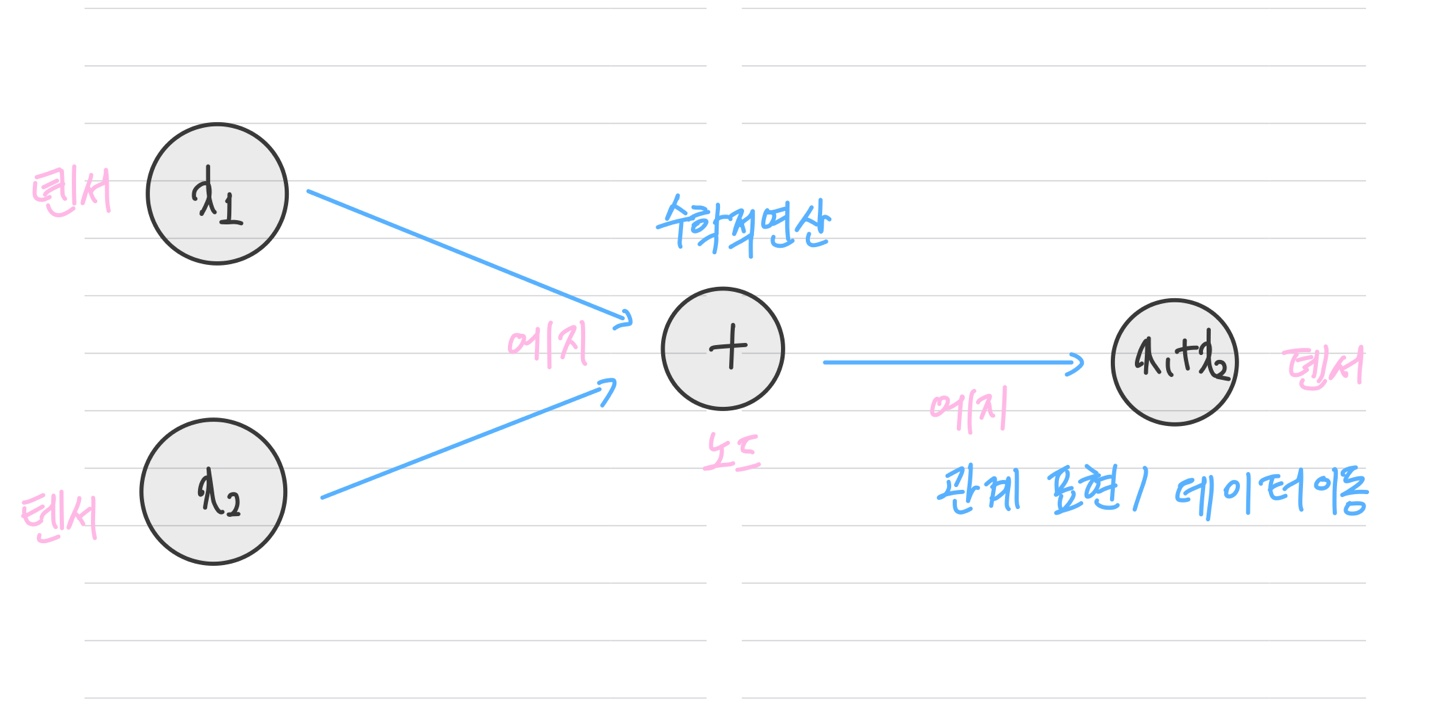

## **텐서플로우 실습**
### **1. 라이브러리 설치 및 업그레이드 in prompt**
### **2. 라이브러리 import**

In [ ]:
import pandas as pd # 데이터 처리
import numpy as np # 행렬 연산
import tensorflow as tf

import matplotlib.pyplot as plt # 2D, 3D 플롯(그래프)팅 패키지
%matplotlib inline

import seaborn as sns # df 활용 통계지표를 낼 수 있는 시각화 차트 제공
sns.set(style="darkgrid")

### **3. 데이터 내려받기 https://github.com/gilbutITbook/080263**
### **4. 구글 드라이브 업로드 후 마운트**

In [ ]:
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()   # 데이터 불러오기
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output'] # 열 이름 지정
cars = pd.read_csv('car_evaluation.csv', names=cols, header=None)

Saving car_evaluation.csv to car_evaluation (1).csv


In [ ]:
cars.tail()

,price,maint,doors,persons,lug_capacity,safety,output
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


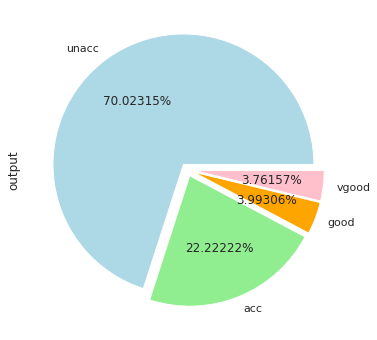

In [ ]:
plot_size = plt.rcParams["figure.figsize"]
plot_size [0] = 8
plot_size [1] = 6
plt.rcParams["figure.figsize"] = plot_size
cars.output.value_counts().plot(kind='pie', autopct='%0.05f%%', 
                                colors=['lightblue', 'lightgreen', 'orange', 'pink'], 
                                explode=(0.05, 0.05, 0.05,0.05))

**대부분의 자동차(70%)는 허용 불가능한 상태, 20%만 허용 가능한 수준**
> 양호한 상태의 차량 비율이 매우 낮음

### **5. 데이터 전처리**
딥러닝 모델에 사용하기 위해 범주형 -> 숫자형 변형

In [ ]:
# 원-핫 인코딩 적용
price = pd.get_dummies(cars.price, prefix='price') # get_dummies: 가변수 만드는 메서드
maint = pd.get_dummies(cars.maint, prefix='maint')

doors = pd.get_dummies(cars.doors, prefix='doors')
persons = pd.get_dummies(cars.persons, prefix='persons')

lug_capacity = pd.get_dummies(cars.lug_capacity, prefix='lug_capacity')
safety = pd.get_dummies(cars.safety, prefix='safety')

labels = pd.get_dummies(cars.output, prefix='condition')

X = pd.concat([price, maint, doors, persons, lug_capacity, safety] , axis=1) # 병합하여 하나의 테이블로 만듦
y = labels.values

In [ ]:
X.tail()

,price_high,price_low,price_med,price_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,persons_more,lug_capacity_big,lug_capacity_med,lug_capacity_small,safety_high,safety_low,safety_med
1723,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1
1724,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
1725,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0
1726,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1
1727,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0


### **6. 훈련과 검증 데이터셋으로 분리**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 클래스 값을 포함하여 하나로 받는 경우
# df_train, df_test = train_test_split(df, test_size = 0.4, randome_state = 0)

test_size는 테스트 셋의 비율 (기본값 0.25)   
random_state는 데이터셋을 섞을 때 해당 값(int)를 참조하여 섞는 것 *고정해두어야 함

### **7. 모델 생성 및 컴파일**

In [ ]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout # keras API 이용
from tensorflow.keras.models import Model

input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(y.shape[1], activation='softmax')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
dense (Dense)                (None, 15)                330       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 44        
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________


* 밀집층(Dense) 총 3개로 구성
> * 처음 두 개는 ReLU 활성화 함수를 사용하는 노드 15개와 노드 10개로 구성   
> * 마지막 밀집층은 소프트맥스 활성화 함수를 사용하는 노드 4개로 구성   
> * 손실함수는 categorical_crossentropy, 옵티마이저는 Adam 사용
>> * categorical_crossentropy와 sparse_categorical_crossentropy 는 모두 다중 분류에 대한 손실함수로 사용, 전자는 원-핫 인코딩 결과 / 후자는 정수형으로 출력됨

### **8. 모델 훈련**

In [ ]:
history = model.fit(X_train, y_train, batch_size=8, epochs=50, verbose=1, validation_split=0.2)
# y = Wx + B # fit

Epoch 1/50
139/139 [==============================] - 1s 3ms/step - loss: 1.1383 - acc: 0.6398 - val_loss: 0.8722 - val_acc: 0.6570
Epoch 2/50
139/139 [==============================] - 0s 2ms/step - loss: 0.6453 - acc: 0.7294 - val_loss: 0.6664 - val_acc: 0.6715
Epoch 3/50
139/139 [==============================] - 0s 2ms/step - loss: 0.4837 - acc: 0.7855 - val_loss: 0.5406 - val_acc: 0.7834
Epoch 4/50
139/139 [==============================] - 0s 2ms/step - loss: 0.3851 - acc: 0.8624 - val_loss: 0.4665 - val_acc: 0.8231
Epoch 5/50
139/139 [==============================] - 0s 2ms/step - loss: 0.3283 - acc: 0.8814 - val_loss: 0.4138 - val_acc: 0.8592
Epoch 6/50
139/139 [==============================] - 0s 2ms/step - loss: 0.2873 - acc: 0.9041 - val_loss: 0.3789 - val_acc: 0.8628
Epoch 7/50
139/139 [==============================] - 0s 2ms/step - loss: 0.2580 - acc: 0.9113 - val_loss: 0.3595 - val_acc: 0.8412
Epoch 8/50
139/139 [==============================] - 0s 2ms/step - loss: 0.

* 배치(batch)와 에포크(epoch)   

배치는 한 번 업데이트시킬 때 사용되는 데이터의 묶음
> ex. 1,000개의 데이터, batch = 20 이라면, 데이터 20개마다 가중치를  업데이트하므로 총 50번의 업데이트가 진행   

에포크는 학습 횟수를 의미   
> ex. epoch = 10, batch = 20이면, 가중치를 50번 업데이트하는 작업을 총 10번 반복하므로 총 500번의 업데이트가 진행

### **9. 모델 검증**

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

11/11 [==============================] - 0s 2ms/step - loss: 0.0621 - acc: 0.9827
Test Score: 0.06212470307946205
Test Accuracy: 0.9826589822769165


* 모델 평가 지표
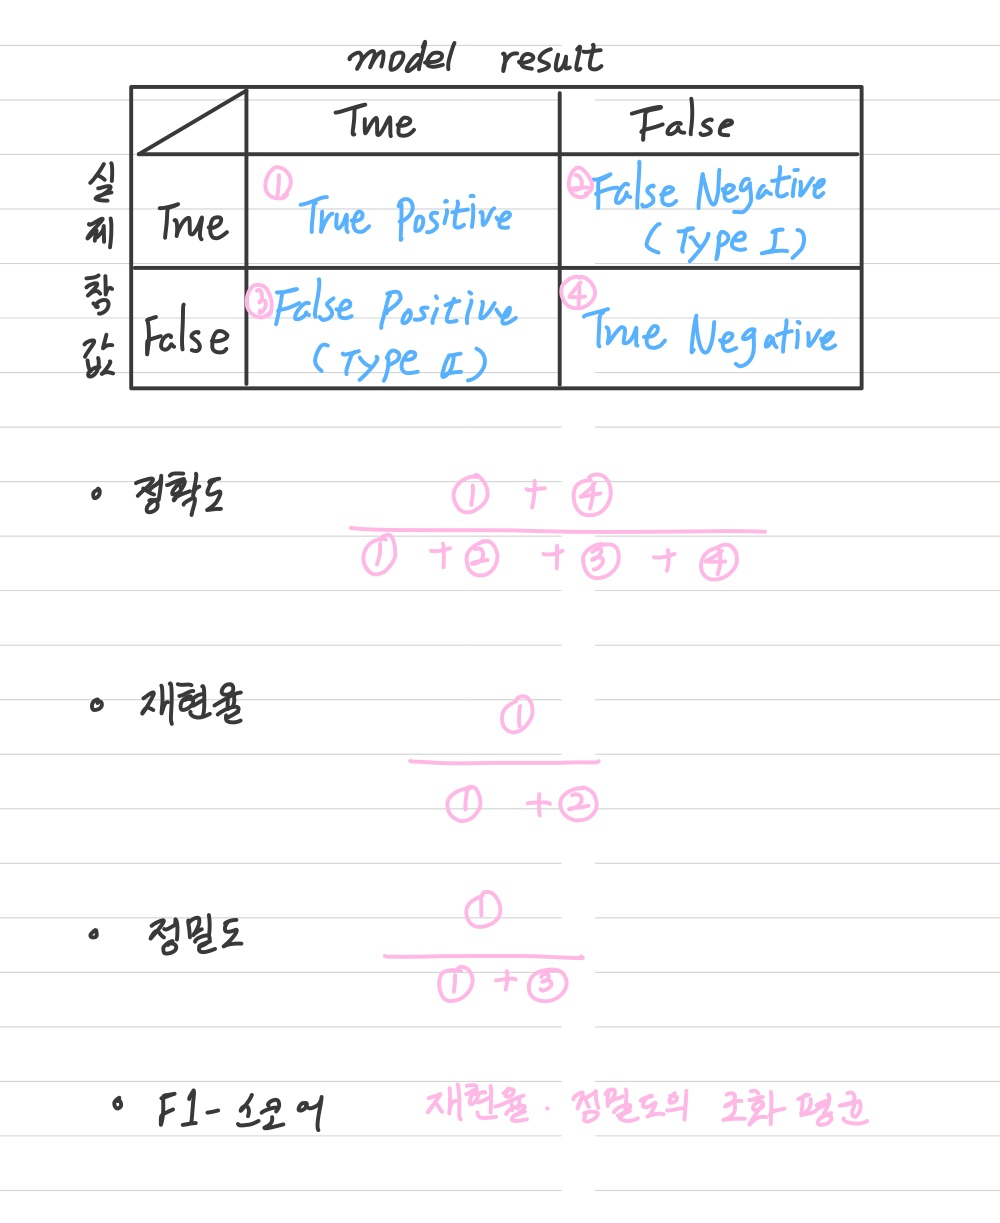